# Import Libraries

In [1]:
import os, sys
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
path_parent = os.path.dirname(os.getcwd())
sys.path.insert(0, path_parent+'/Telecom-Data-Analysis/scripts')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
# !pip install openpyxl


In [3]:
from EDA import *
from data_preprocess import *
from data_clean import *

In [4]:
# df = pd.read_excel('../data/Week1_challenge_data_source.xlsx')
df_desc =  pd.read_excel('data/Field Descriptions.xlsx')
# df.to_pickle('../data/data_in_Dataframe.pkl')
df = pd.read_pickle('data/data_in_Dataframe.pkl')


# Explore Data

In [5]:
df.shape

(150001, 55)

In [6]:
df.isnull().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [7]:
# the total amount of empty entries in each column with total percentage
df.isnull().sum()/df.shape[0]*100

Bearer Id                                   0.66
Start                                       0.00
Start ms                                    0.00
End                                         0.00
End ms                                      0.00
Dur. (ms)                                   0.00
IMSI                                        0.38
MSISDN/Number                               0.71
IMEI                                        0.38
Last Location Name                          0.77
Avg RTT DL (ms)                            18.55
Avg RTT UL (ms)                            18.54
Avg Bearer TP DL (kbps)                     0.00
Avg Bearer TP UL (kbps)                     0.00
TCP DL Retrans. Vol (Bytes)                58.76
TCP UL Retrans. Vol (Bytes)                64.43
DL TP < 50 Kbps (%)                         0.50
50 Kbps < DL TP < 250 Kbps (%)              0.50
250 Kbps < DL TP < 1 Mbps (%)               0.50
DL TP > 1 Mbps (%)                          0.50
UL TP < 10 Kbps (%) 

In [8]:
df.dtypes

Bearer Id                                          float64
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [9]:
df['MSISDN/Number'].isnull().sum()

1066

In [10]:
# drop the rows that have Bearer Id null
df.dropna(subset=['MSISDN/Number'],inplace=True)

In [11]:
df['Bearer Id'].isnull().sum()

429

In [12]:
df.dropna(subset=['Bearer Id'],inplace=True)


In [13]:
# Columns having missing values
missing_categorical_columns = [col for col in df.columns if df[col].isnull().sum() > 0 and df[col].dtype=='object']
missing_non_categorical_columns = [col for col in df.columns if df[col].isnull().sum() > 0 and df[col].dtype !='object']

In [14]:
missing_percent = get_numerical_summary(df,missing_categorical_columns)


Last Location Name : 160 (0.108%)


In [15]:
get_value_counts(df)

----------------------------------
Last Location Name 

D41377B             80
D17085A             59
D72396C             57
D73604C             55
9164566985995010    55
                    ..
G70803B              1
D29786A              1
L30014C              1
D85815C              1
L88342B              1
Name: Last Location Name, Length: 45379, dtype: int64
----------------------------------
Handset Manufacturer 

Apple                                59339
Samsung                              40429
Huawei                               34296
undefined                             8904
Sony Mobile Communications Ab          967
                                     ...  
Doke Communication (Hk) Limited          1
Vastking Technology (Hk) Limited         1
Mobiwire Sas                             1
Shenzhen Diadem Technology Co Ltd        1
Shenzhen Gaoxinqi                        1
Name: Handset Manufacturer, Length: 170, dtype: int64
----------------------------------
Handset Type 

Hu

In [16]:
df['Handset Type'].value_counts()[:10]

Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9395
Apple iPhone 6 (A1586)           8993
undefined                        8904
Apple iPhone 7 (A1778)           6279
Apple iPhone Se (A1723)          5165
Apple iPhone 8 (A1905)           4977
Apple iPhone Xr (A2105)          4556
Samsung Galaxy S8 (Sm-G950F)     4464
Apple iPhone X (A1901)           3806
Name: Handset Type, dtype: int64

In [17]:
df[missing_categorical_columns].describe()

,Last Location Name
count,148346
unique,45379
top,D41377B
freq,80


In [18]:
# we can add Missing to the missing categorical columns
df = add_missing(df,missing_categorical_columns)

In [19]:
df[missing_categorical_columns].isnull().sum()

Last Location Name    0
dtype: int64

In [20]:
data_description(df=df,df_desc=df_desc,cols=missing_non_categorical_columns)

Avg RTT DL (ms) ==  Average Round Trip Time measurement Downlink direction (msecond)
Avg RTT UL (ms) ==  Average Round Trip Time measurement Uplink direction (msecond)
TCP DL Retrans. Vol (Bytes) ==  TCP volume of Downlink packets detected as retransmitted (bytes)
TCP UL Retrans. Vol (Bytes) ==  TCP volume of Uplink packets detected as retransmitted (bytes)
DL TP < 50 Kbps (%) ==  Duration ratio when Bearer Downlink Throughput < ….
50 Kbps < DL TP < 250 Kbps (%) ==  Duration ratio when Bearer Downlink Throughput range is …
250 Kbps < DL TP < 1 Mbps (%) ==  Duration ratio when Bearer Downlink Throughput range is …
DL TP > 1 Mbps (%) ==  Duration ratio when Bearer Downlink Throughput > ….
UL TP < 10 Kbps (%) ==  Duration ratio when Bearer Uplink Throughput < ….
10 Kbps < UL TP < 50 Kbps (%) ==  Duration ratio when Bearer Uplink Throughput range is …
50 Kbps < UL TP < 300 Kbps (%) ==  Duration ratio when Bearer Uplink Throughput range is …
UL TP > 300 Kbps (%) ==  Duration ratio when Bear

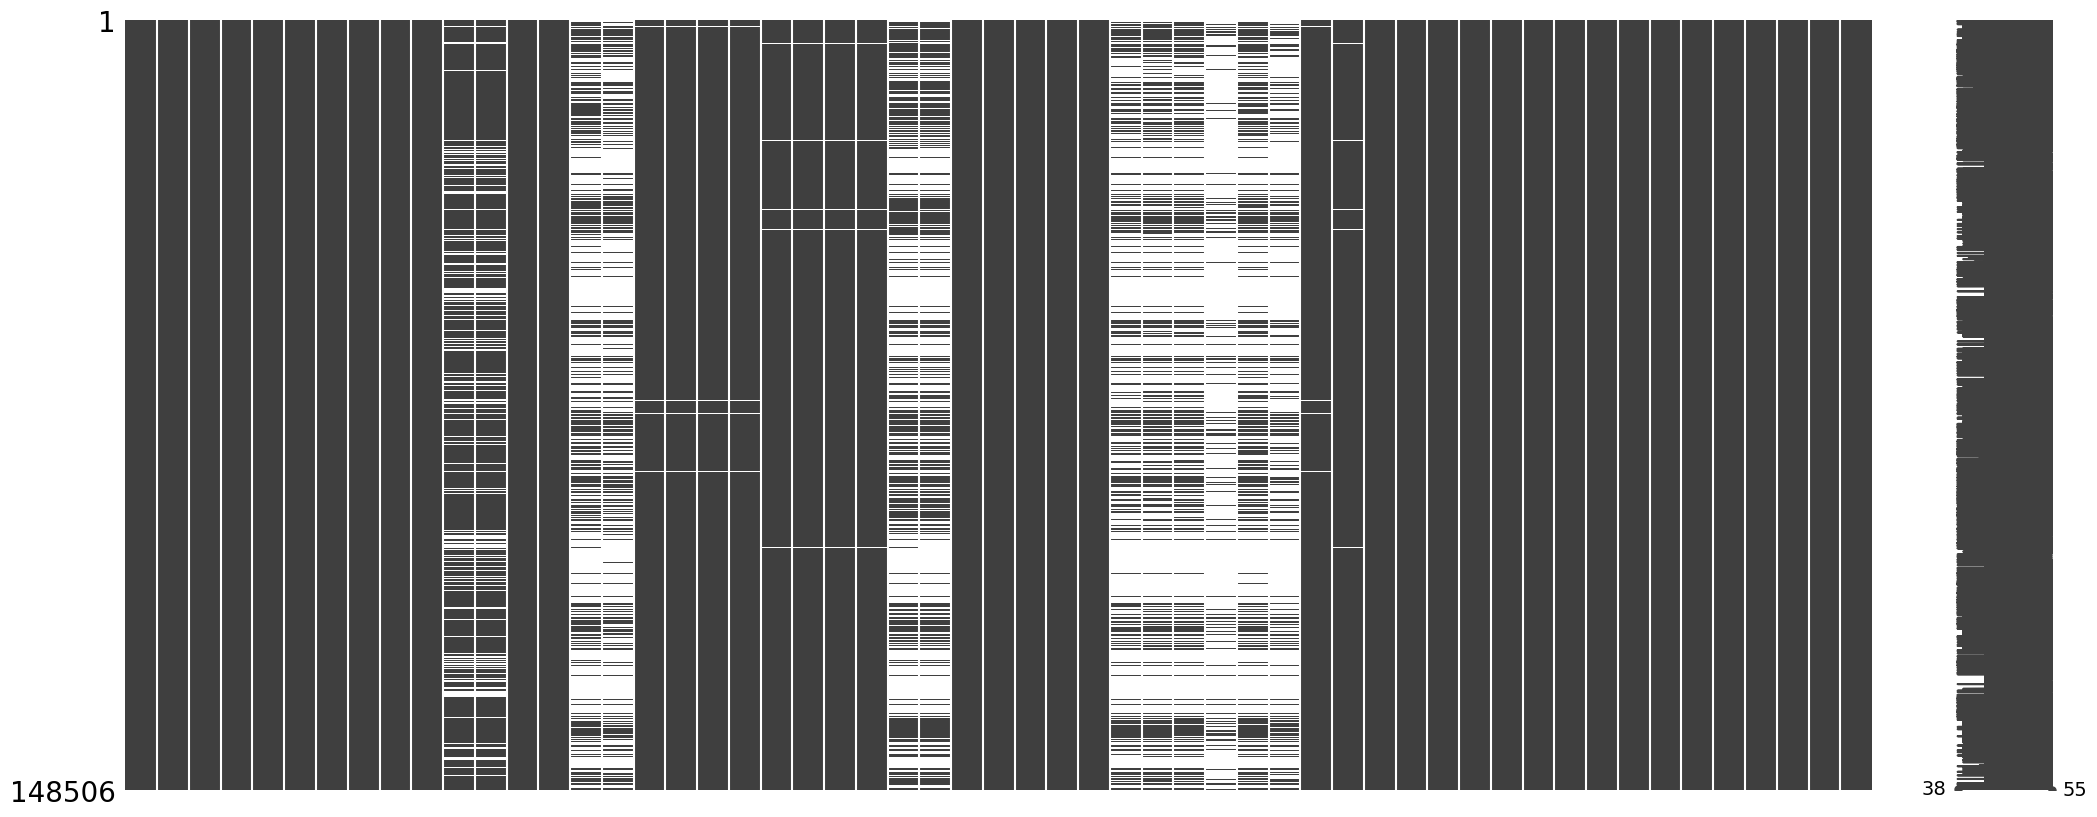

<Figure size 10000x6000 with 0 Axes>

In [21]:
plot_missingno(df)

In [22]:
noncat_missing_percent = get_numerical_summary(df=df,missing_cols=missing_non_categorical_columns)

Avg RTT DL (ms) : 27636 (18.609%)
Avg RTT UL (ms) : 27616 (18.596%)
TCP DL Retrans. Vol (Bytes) : 87764 (59.098%)
TCP UL Retrans. Vol (Bytes) : 96128 (64.73%)
DL TP < 50 Kbps (%) : 712 (0.479%)
50 Kbps < DL TP < 250 Kbps (%) : 712 (0.479%)
250 Kbps < DL TP < 1 Mbps (%) : 712 (0.479%)
DL TP > 1 Mbps (%) : 712 (0.479%)
UL TP < 10 Kbps (%) : 767 (0.516%)
10 Kbps < UL TP < 50 Kbps (%) : 767 (0.516%)
50 Kbps < UL TP < 300 Kbps (%) : 767 (0.516%)
UL TP > 300 Kbps (%) : 767 (0.516%)
HTTP DL (Bytes) : 81129 (54.63%)
HTTP UL (Bytes) : 81475 (54.863%)
Nb of sec with 125000B < Vol DL : 96775 (65.166%)
Nb of sec with 1250B < Vol UL < 6250B : 92269 (62.131%)
Nb of sec with 31250B < Vol DL < 125000B : 92978 (62.609%)
Nb of sec with 37500B < Vol UL : 128950 (86.832%)
Nb of sec with 6250B < Vol DL < 31250B : 87838 (59.148%)
Nb of sec with 6250B < Vol UL < 37500B : 110803 (74.612%)
Nb of sec with Vol DL < 6250B : 713 (0.48%)
Nb of sec with Vol UL < 1250B : 768 (0.517%)


In [23]:
df.isnull().sum()

Bearer Id                                        0
Start                                            0
Start ms                                         0
End                                              0
End ms                                           0
Dur. (ms)                                        0
IMSI                                             0
MSISDN/Number                                    0
IMEI                                             0
Last Location Name                               0
Avg RTT DL (ms)                              27636
Avg RTT UL (ms)                              27616
Avg Bearer TP DL (kbps)                          0
Avg Bearer TP UL (kbps)                          0
TCP DL Retrans. Vol (Bytes)                  87764
TCP UL Retrans. Vol (Bytes)                  96128
DL TP < 50 Kbps (%)                            712
50 Kbps < DL TP < 250 Kbps (%)                 712
250 Kbps < DL TP < 1 Mbps (%)                  712
DL TP > 1 Mbps (%)             

In [24]:
df[missing_non_categorical_columns].describe()

,Avg RTT DL (ms),Avg RTT UL (ms),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),...,HTTP DL (Bytes),HTTP UL (Bytes),Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B
count,"120,870.00","120,890.00","60,742.00","52,378.00","147,794.00","147,794.00","147,794.00","147,794.00","147,739.00","147,739.00",...,"67,377.00","67,031.00","51,731.00","56,237.00","55,528.00","19,556.00","60,668.00","37,703.00","147,793.00","147,738.00"
mean,106.20,17.63,"21,006,808.73","771,051.81",92.87,3.05,1.71,1.61,98.53,0.78,...,"116,144,315.82","3,286,789.94",998.39,344.09,819.85,150.42,975.83,142.69,"3,733.07","4,034.70"
std,587.07,84.75,"183,182,844.67","26,697,071.65",13.03,6.20,4.16,4.83,4.64,3.23,...,"971,199,918.36","19,733,773.00","2,552.65","1,455.37","1,852.50","1,224.94","1,958.92",999.19,"9,202.52","10,193.07"
min,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,...,40.00,40.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,32.00,2.00,"36,081.00","4,695.25",91.00,0.00,0.00,0.00,99.00,0.00,...,"115,118.00","24,834.50",20.00,10.00,26.00,2.00,40.00,3.00,87.00,106.00
50%,45.00,5.00,"580,007.50","21,119.50",100.00,0.00,0.00,0.00,100.00,0.00,...,"2,007,958.00","235,906.00",131.00,53.00,168.00,8.00,293.00,8.00,201.00,216.00
75%,69.00,15.00,"3,810,367.00","84,863.25",100.00,4.00,1.00,0.00,100.00,0.00,...,"26,126,554.00","1,578,634.50",709.50,207.00,772.00,35.00,"1,109.00",32.00,"2,651.00","2,438.00"
max,"96,923.00","7,120.00","4,294,425,570.00","2,908,226,006.00",100.00,93.00,100.00,94.00,100.00,98.00,...,"72,530,636,168.00","1,491,889,672.00","81,476.00","85,412.00","58,525.00","50,553.00","66,913.00","49,565.00","604,061.00","604,122.00"


In [25]:
missing_non_categorical_columns = list(missing_non_categorical_columns)
missing_non_categorical_columns.sort()

In [26]:
df[missing_non_categorical_columns].isnull().sum()/df.shape[0]*100

10 Kbps < UL TP < 50 Kbps (%)               0.52
250 Kbps < DL TP < 1 Mbps (%)               0.48
50 Kbps < DL TP < 250 Kbps (%)              0.48
50 Kbps < UL TP < 300 Kbps (%)              0.52
Avg RTT DL (ms)                            18.61
Avg RTT UL (ms)                            18.60
DL TP < 50 Kbps (%)                         0.48
DL TP > 1 Mbps (%)                          0.48
HTTP DL (Bytes)                            54.63
HTTP UL (Bytes)                            54.86
Nb of sec with 125000B < Vol DL            65.17
Nb of sec with 1250B < Vol UL < 6250B      62.13
Nb of sec with 31250B < Vol DL < 125000B   62.61
Nb of sec with 37500B < Vol UL             86.83
Nb of sec with 6250B < Vol DL < 31250B     59.15
Nb of sec with 6250B < Vol UL < 37500B     74.61
Nb of sec with Vol DL < 6250B               0.48
Nb of sec with Vol UL < 1250B               0.52
TCP DL Retrans. Vol (Bytes)                59.10
TCP UL Retrans. Vol (Bytes)                64.73
UL TP < 10 Kbps (%) 

In [27]:
df_temp = df[missing_non_categorical_columns].isnull().sum()/df.shape[0]*100
missing_less_cols = []
final_missing_cols = []
for i,x in df_temp.items():
    if x <1:
        missing_less_cols.append(i)
    else:
        final_missing_cols.append(i)

In [28]:
# columns with missing value that is less than 1%
df[missing_less_cols].isnull().sum()/df.shape[0]*100


10 Kbps < UL TP < 50 Kbps (%)    0.52
250 Kbps < DL TP < 1 Mbps (%)    0.48
50 Kbps < DL TP < 250 Kbps (%)   0.48
50 Kbps < UL TP < 300 Kbps (%)   0.52
DL TP < 50 Kbps (%)              0.48
DL TP > 1 Mbps (%)               0.48
Nb of sec with Vol DL < 6250B    0.48
Nb of sec with Vol UL < 1250B    0.52
UL TP < 10 Kbps (%)              0.52
UL TP > 300 Kbps (%)             0.52
dtype: float64

In [29]:
# columns with missing value that is more than 1%
df[final_missing_cols].isnull().sum()/df.shape[0]*100


Avg RTT DL (ms)                            18.61
Avg RTT UL (ms)                            18.60
HTTP DL (Bytes)                            54.63
HTTP UL (Bytes)                            54.86
Nb of sec with 125000B < Vol DL            65.17
Nb of sec with 1250B < Vol UL < 6250B      62.13
Nb of sec with 31250B < Vol DL < 125000B   62.61
Nb of sec with 37500B < Vol UL             86.83
Nb of sec with 6250B < Vol DL < 31250B     59.15
Nb of sec with 6250B < Vol UL < 37500B     74.61
TCP DL Retrans. Vol (Bytes)                59.10
TCP UL Retrans. Vol (Bytes)                64.73
dtype: float64

In [30]:
# we can see select those with minimum null percentage and impute them using their median
df = impute_skewed(df=df,cols=missing_less_cols)

In [31]:
df[missing_less_cols].isnull().sum()

10 Kbps < UL TP < 50 Kbps (%)     0
250 Kbps < DL TP < 1 Mbps (%)     0
50 Kbps < DL TP < 250 Kbps (%)    0
50 Kbps < UL TP < 300 Kbps (%)    0
DL TP < 50 Kbps (%)               0
DL TP > 1 Mbps (%)                0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250B     0
UL TP < 10 Kbps (%)               0
UL TP > 300 Kbps (%)              0
dtype: int64

In [32]:
# we can impute these features using KNN imputing or the novel approach of multivariate feature imputation [we can evaluate their performamnce later]
df[final_missing_cols].isnull().sum()

Avg RTT DL (ms)                              27636
Avg RTT UL (ms)                              27616
HTTP DL (Bytes)                              81129
HTTP UL (Bytes)                              81475
Nb of sec with 125000B < Vol DL              96775
Nb of sec with 1250B < Vol UL < 6250B        92269
Nb of sec with 31250B < Vol DL < 125000B     92978
Nb of sec with 37500B < Vol UL              128950
Nb of sec with 6250B < Vol DL < 31250B       87838
Nb of sec with 6250B < Vol UL < 37500B      110803
TCP DL Retrans. Vol (Bytes)                  87764
TCP UL Retrans. Vol (Bytes)                  96128
dtype: int64

# Encoding

### Frequency Encoding
- I used frequency encoding because the number of occurence is an important information in the categorical features as it represents customers choice

In [33]:
categorical_columns = [col for col in df.columns if  df[col].dtype=='object']

In [34]:
categorical_columns

['Last Location Name', 'Handset Manufacturer', 'Handset Type']

In [35]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,"13,114,483,460,844,900,352.00",2019-04-04 12:01:18,770.00,2019-04-25 14:35:31,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9164566995485190,...,"15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00"
1,"13,114,483,482,878,900,224.00",2019-04-09 13:04:04,235.00,2019-04-25 08:15:48,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,...,"20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00"
2,"13,114,483,484,080,500,736.00",2019-04-09 17:42:11,1.00,2019-04-25 11:58:13,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,...,"19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00"
3,"13,114,483,485,442,799,616.00",2019-04-10 00:31:25,486.00,2019-04-25 07:36:35,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,...,"21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00"
4,"13,114,483,499,480,700,928.00",2019-04-12 20:10:23,565.00,2019-04-25 10:40:32,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,...,"15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,"13,042,425,979,329,300,480.00",2019-04-29 07:28:41,615.00,2019-04-30 00:01:49,407.00,"59,587.00","208,201,402,604,057.00","33,668,648,496.00","35,332,510,508,318.00",T85721A,...,"6,550,499.00","18,003,146.00","22,468,983.00","7,149,728.00","784,435,351.00","12,724,751.00","321,383,162.00","14,890,486.00","53,745,392.00","819,016,468.00"
149996,"7,277,825,670,196,679,680.00",2019-04-29 07:28:42,451.00,2019-04-30 06:02:33,214.00,"81,230.00","208,202,201,200,072.00","33,650,688,697.00","35,483,109,451,938.00",D20434A,...,"16,191,667.00","11,763,428.00","17,883,703.00","19,678,161.00","526,609,673.00","9,197,207.00","3,264,510.00","13,487,416.00","57,628,851.00","574,175,259.00"
149997,"7,349,883,264,234,609,664.00",2019-04-29 07:28:42,483.00,2019-04-30 10:41:33,187.00,"97,970.00","208,201,908,153,249.00","33,663,449,963.00","35,660,508,296,467.00",D10223C,...,"13,877,234.00","8,288,284.00","19,350,146.00","21,293,148.00","626,893,062.00","4,735,033.00","712,180,387.00","2,457,758.00","39,135,081.00","666,648,844.00"
149998,"13,114,483,573,367,300,096.00",2019-04-29 07:28:43,283.00,2019-04-30 10:46:12,810.00,"98,249.00","208,201,711,161,187.00","33,621,890,103.00","35,721,209,870,907.00",T51102A,...,"22,660,510.00","1,855,903.00","9,963,942.00","5,065,760.00","553,539,484.00","13,394,316.00","121,100,856.00","11,314,729.00","34,912,224.00","592,786,405.00"


In [36]:
df = frequency_encoder(df=df,cols=categorical_columns)

In [37]:
# df.to_pickle('data/df_clean.pkl')

# Data Imputation


In [39]:
# we can remove the encoded features
df = drop_cols(df=df,cols=categorical_columns)

In [40]:
total_cols_without_datetime= [x for x in df.columns if df[x].dtype != 'datetime64[ns]']

### 1. KNN Imputer

In [45]:
from sklearn.impute import KNNImputer
df_knn = df[total_cols_without_datetime].copy()

In [46]:
# Initializing KNNImputer
knn = KNNImputer()

# knn.fit(df_knn)

In [42]:
# df_knn = knn.transform(df_knn)

In [69]:
df_knn.drop(df_knn[df_knn['MSISDN/Number']==33663706799.00].index,inplace=True)

In [70]:
df_knn = pd.DataFrame(data = df_knn,columns=total_cols_without_datetime)
df_knn.to_pickle('data/df_knn.pkl')

### 2. Multi-variate Feature Imputer

In [41]:
df_iterative = df[total_cols_without_datetime].copy()

In [42]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_iterative)
df_iterative = imp.transform(df_iterative)

In [43]:
df_iterative = pd.DataFrame(data = df_iterative,columns=total_cols_without_datetime)

In [44]:
df_iterative.to_pickle('data/df_iterative.pkl')

### 3. Median Imputer

In [45]:
df_median = df[total_cols_without_datetime].copy()


In [46]:
df_median = impute_skewed(df=df_median,cols=final_missing_cols)

In [47]:
df_median.to_pickle('data/df_median.pkl')

# Scaling and Standardization

### minmax scaling

In [48]:
df_median=pd.read_pickle('data/df_median.pkl')
df_iterative=pd.read_pickle('data/df_iterative.pkl')
df_knn=pd.read_pickle('data/df_knn.pkl')

In [49]:
columns = df_median.columns
df_median = scale_dataframe(df=df_median,cols=columns)
df_iterative = scale_dataframe(df=df_iterative,cols=columns)
df_knn = scale_dataframe(df=df_knn,cols=columns)

In [50]:
df_iterative.to_pickle('data/scaled_df_iterative.pkl')
df_median.to_pickle('data/scaled_df_median.pkl')
df_knn.to_pickle('data/scaled_df_knn.pkl')